<a href="https://colab.research.google.com/github/MarcelJonesRaymond/Neural-Network-and-Deep-Learning/blob/main/Week_2_content_Mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
random.seed(0)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist

In [7]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
display(x_train.shape,x_test.shape)

(60000, 28, 28)

(10000, 28, 28)

In [9]:
display(y_train.shape,y_test.shape)

(60000,)

(10000,)

Label:  5


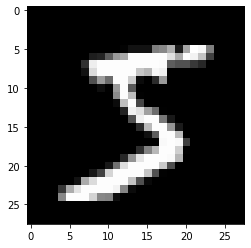

In [12]:
print('Label: ',y_train[0])
plt.imshow(x_train[0],cmap='gray')

Label:  3


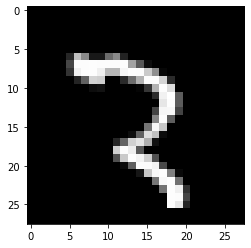

In [13]:
print('Label: ',y_train[500])
plt.imshow(x_train[500],cmap='gray')

Reshape train and test sets into compatible shapes
Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
do not reshape labels

In [14]:
X_train=x_train.reshape(x_train.shape[0],28,28,1)
X_test=x_test.reshape(x_test.shape[0],28,28,1)

In [16]:
display(X_train.shape,X_test.shape)

(60000, 28, 28, 1)

(10000, 28, 28, 1)

Normalizing the data

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [25]:
from tensorflow.keras.utils import to_categorical
Y_train=to_categorical(y_train,num_classes=10)
Y_test=to_categorical(y_test,num_classes=10)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [28]:
model=Sequential()
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [29]:
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=100)

Epoch 1/100
600/600 [==============================] - 4s 6ms/step - loss: 1.1098 - accuracy: 0.7278 - val_loss: 0.5719 - val_accuracy: 0.8651
Epoch 2/100
600/600 [==============================] - 3s 5ms/step - loss: 0.5018 - accuracy: 0.8714 - val_loss: 0.4140 - val_accuracy: 0.8909
Epoch 3/100
600/600 [==============================] - 3s 5ms/step - loss: 0.4056 - accuracy: 0.8904 - val_loss: 0.3582 - val_accuracy: 0.9044
Epoch 4/100
600/600 [==============================] - 3s 5ms/step - loss: 0.3622 - accuracy: 0.8998 - val_loss: 0.3280 - val_accuracy: 0.9103
Epoch 5/100
600/600 [==============================] - 3s 5ms/step - loss: 0.3353 - accuracy: 0.9058 - val_loss: 0.3071 - val_accuracy: 0.9141
Epoch 6/100
600/600 [==============================] - 3s 5ms/step - loss: 0.3158 - accuracy: 0.9106 - val_loss: 0.2916 - val_accuracy: 0.9192
Epoch 7/100
600/600 [==============================] - 3s 5ms/step - loss: 0.3001 - accuracy: 0.9146 - val_loss: 0.2793 - val_accuracy: 0.9216

In [30]:
yhat=model.predict(X_test)

In [33]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0869 - accuracy: 0.9736


[0.08685817569494247, 0.9735999703407288]